# Clasificación de Secuencias con LSTM

Este proyecto implementa un modelo de clasificación de sentimientos utilizando redes LSTM (Long Short-Term Memory) para analizar reseñas de películas del dataset IMDB.


# Clasificación de Secuencias## ObjetivosEl objetivo de este notebook es continuar nuestro trabajo con secuencias a partir del ejemplo visto en el ejemplo base.### Punto de partidaComo hemos hecho en otras ocasiones, para este notebook vamos a comenzar como punto de partida con el código visto en el ejemplo base sobre el que realizaremos las modificaciones necesarias.Es preferible trabajar en colab con Runtime Type: GPU para poder trabajar con todos los datos sin que nos tome una eternidad.

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
maxlen = 150  # número máximo de palabras que tendrán nuestras opiniones
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
x_train = x_train[1:2500,:]
y_train = y_train[1:2500]

x_test = x_test[1:2500,:]
y_test = y_test[1:2500]

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5300 - loss: 0.6925 - val_accuracy: 0.4902 - val_loss: 0.6907
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5976 - loss: 0.6716 - val_accuracy: 0.7575 - val_loss: 0.5419
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7837 - loss: 0.4678 - val_accuracy: 0.6911 - val_loss: 0.7108
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8789 - loss: 0.3192 - val_accuracy: 0.7811 - val_loss: 0.4581
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9280 - loss: 0.2027 - val_accuracy: 0.8207 - val_loss: 0.4844
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9625 - loss: 0.1260 - val_accuracy: 0.7527 - val_loss: 0.5591
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9696

TODO 1. Añadir el código necesario para mostrar las curvas de aprendizaje y analizar
las mismas.

### Análisis del rendimiento

Vamos a empezar por mejorar nuestra capacidad de evaluar el modelo. Añadid a continuación el código necesario poder ver las curvas de entrenamiento de forma gráfica. A continuación, reentrenad la red y mostradlas. ¿Qué dirías del rendimiento de nuestro modelo?


In [2]:
import matplotlib.pyplot as plt

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9942 - loss: 0.0204 - val_accuracy: 0.7927 - val_loss: 0.6173
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.7975 - val_loss: 0.7534
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8099 - val_loss: 1.1345
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9962 - loss: 0.0089 - val_accuracy: 0.8087 - val_loss: 1.0568
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9974 - loss: 0.0123 - val_accuracy: 0.8183 - val_loss: 0.9419
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9988 - loss: 0.0025 - val_accuracy: 0.8127 - val_loss: 1.0252
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.8155 - val_loss: 0.7574
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 9.0909e-04 - val_accuracy: 0.8059

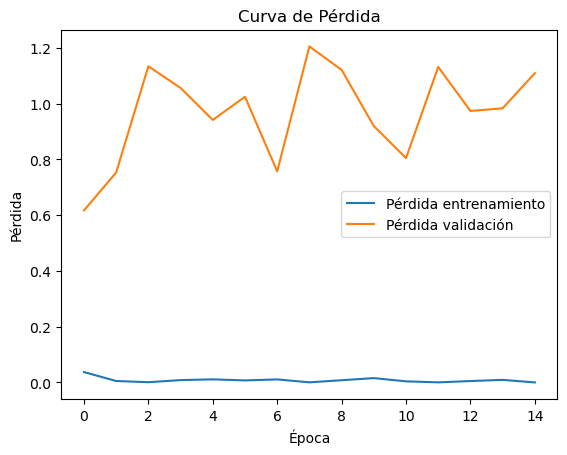

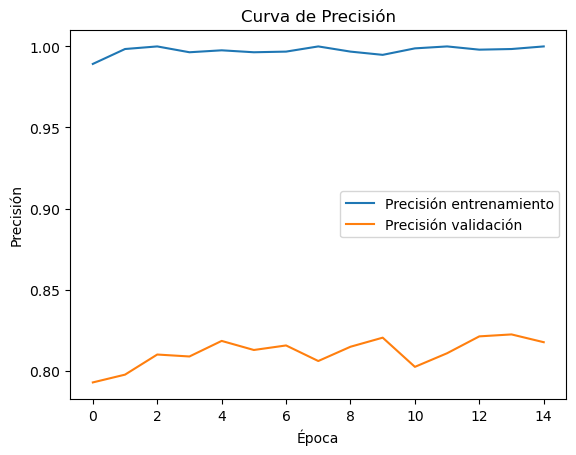

In [3]:
# 1) Entrenar guardando el historial
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=15,
    validation_data=(x_test, y_test)
)

# 2) Evaluar 
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# 3) Trazar curvas de pérdida y precisión

# Curva de pérdida
plt.figure()
plt.plot(history.history['loss'],     label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Curva de precisión
plt.figure()
plt.plot(history.history['accuracy'],     label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
"""

Memorización rápida
	- En las gráficas se observa que la precisión de entrenamiento llega casi al 100 % (loss ≃ 0) antes de la mitad de las épocas, 
        mientras que la pérdida de validación se estanca y hasta sube en varios puntos.

Generalización pobre
	- La precisión de validación se queda siempre en torno al 80–82 %, muy lejos del ~99–100 % de entrenamiento.
	- La pérdida de validación rebota (picos en épocas 3, 6, 8, 10…) en lugar de descender de forma sostenida, señal 
        de que el modelo “aprende ruido” del conjunto de entrenamiento.

"""

TODO 2. Añadir Dropout a nuestra red de la forma indicada y analizar el resultado.

### Dropout

Vamos a empezar a modificar el código añadiendo Dropout, lo que idealmente nos va a permitir mejorar el entrenamiento y reducir el sobreentramiento.

A continuación copiad y pegad el código anterior y realizar las modificaciones necesarias para:
- Realizar dropout sobre la capa Embedding con una probabilidad del 40%
- Realizar dropout sobre la capa LSTM con una probabilidad del 40%

Recordad mostrar las curvas de entrenamiento.

Uno de los efectos que podemos observar (y convendría recordar) cuando realizamos dropout es que a la red le cuesta más entrenar y tarda más en mejorar los resultados de train. A cambio, debería tener un menor sobreentrenamiento y, aunque tarde más, el resultado final suele mejorar.

¿Qué rendimiento se observa ahora en nuestro modelo a juzgar por las gráficas?

In [5]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen      = 150
batch_size  = 32
epochs      = 15

# Carga de datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)[1:2500]
y_train = y_train[1:2500]
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)[1:2500]
y_test  = y_test[1:2500]

# Modelo con Dropout
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(SpatialDropout1D(0.4))               # dropout sobre embeddings
model.add(LSTM(32, dropout=0.4,                # dropout sobre la entrada LSTM
               recurrent_dropout=0.0))         # sin dropout recurrente
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenamiento guardando historial
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

# Evaluación final
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5230 - loss: 0.6919 - val_accuracy: 0.6042 - val_loss: 0.6896
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6094 - loss: 0.6820 - val_accuracy: 0.7251 - val_loss: 0.6080
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7191 - loss: 0.5806 - val_accuracy: 0.7879 - val_loss: 0.5134
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8000 - loss: 0.4431 - val_accuracy: 0.7655 - val_loss: 0.4761
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8522 - loss: 0.3531 - val_accuracy: 0.7935 - val_loss: 0.4528
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8953 - loss: 0.2865 - val_accuracy: 0.8315 - val_loss: 0.3886
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9126 - loss: 0.2300 - val_accuracy: 0.7951 - val_loss: 0.4350
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9265 - loss: 0.2046 - val_accuracy: 0.8275 - val_loss: 0.

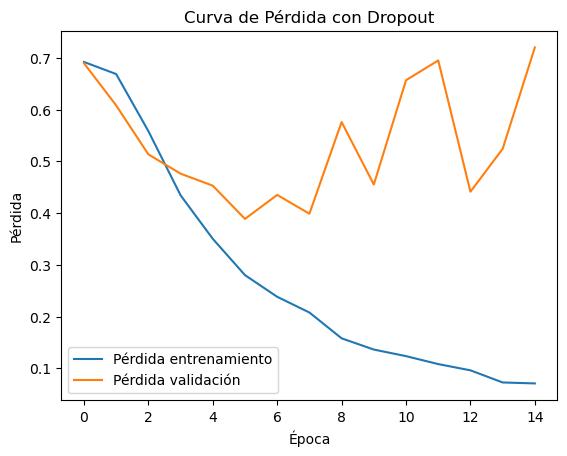

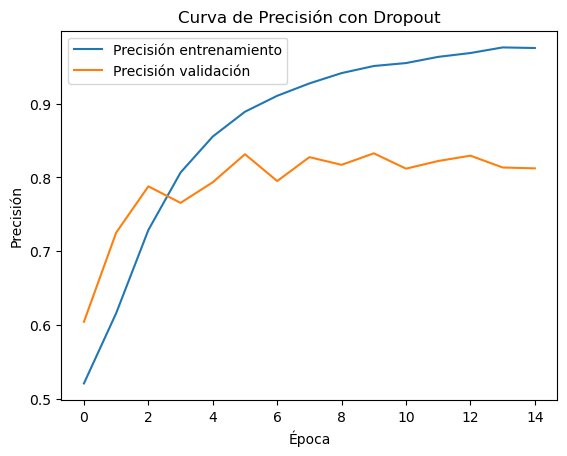

In [6]:
# Curva de pérdida
plt.figure()
plt.plot(history.history['loss'],     label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Curva de Pérdida con Dropout')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Curva de precisión
plt.figure()
plt.plot(history.history['accuracy'],     label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Curva de Precisión con Dropout')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
"""

1.	Entrenamiento más pausado: La curva de pérdida de entrenamiento baja de forma mucho más suave y la precisión tarda más en 
        escalar (por ejemplo, no se llega a 0.90 de accuracy hasta la época 6–7, cuando sin dropout ya se tenia en la 4–5).

2.	Validación más estable y algo mejor
	- La pérdida de validación desciende también de forma más gradual y los picos de “rebotado” son menos extremos.
	- La precisión de validación alcanza su máximo entorno a 0.83 (épocas 6 y 10), ligeramente por encima del ~0.82 que se conseguia antes.

3.	Reducción del gap train/val
	- El hueco entre entrenamiento (≃0.98–1.00) y validación (≃0.81–0.83) sigue existiendo, pero es menor que sin dropout. Eso significa 
        que el modelo memoriza menos el ruido de entrenamiento y generaliza algo mejor.

4.	Punto de parada ideal
	- A partir de la época 6–8 la validación ya no mejora, así que convendría aplicar early stopping o recortar a 6–8 épocas para evitar 
        el ligero sobreajuste residual.

"""

TODO 3. Modificar la red para utilizar una combinación de CNN, LSTM y DNN que
resuelva el problema de clasificación de secuencias. ¿Por qué combinamos estas redes?

### CNNs + LSTMs + DNNs!

En este apartado vamos a intentar realizar una modificación un poco más compleja a nuestro sistema base.

Como sabemos, las redes Convolucionales o CNN están inspiradas en la vista humana y son muy buenas en la extracción de características sobre imágenes. Además de esto, han sido aplicadas con éxito a señales como la señal de audio o incluso señales temporales como los precios de un stock en el mercado de valores.

Sin embargo, para trabajar con secuencias, sabemos que la mejor opción son las redes recurrentes, donde destaca particularmente la red LSTM.

Una de las mejores cualidades de las redes neuronales es que son muy flexibles y podemos implementar fácilmente casi cualquier arquitectura que imaginemos. En este apartado vamos a utilizar una red que está siendo utilizada a día de hoy en muchisimos sistemas de empresas como Google, Amazon o Facebook, que lideran cláramente este campo.

Esta red es una combinación de redes convolucionales, recurrentes, y feed-forward. ¿Por qué esta combinación?
- Las redes convolucionales son buenas como extractor de características y pueden encontrar información muy útil de forma local, sobre pequeños campos receptivos de los datos de entrada
- Las redes LSTM son buenas para modelar cualquier tipo de secuencia, ya que pueden aprender del pasado y tener en cuenta el contexto
- Las redes DNN son buenas aprendiendo cualquier tipo de transformación no lineal, y por tanto en nuestro ejemplo las vamos a utilizar para extraer la salida de las LSTM y convertirla en la solución a la tarea que estamos intentando resolver


Manos a la obra, qué necesitamos para introducir estos cambios?
- Importar las nuevas capas que vamos a necesitar, que son las siguientes:
    - Conv1D , es como Conv2D pero trabaja con datos de 1 sóla dimensión.
    - MaxPooling1D , lo mismo
- Modificar el modelo añadiendo las capas necesarias, buscad en la documentación de keras o en algún ejemplo en google la sintaxis. Ojo!! la sintaxis ha ido cambiando con las versiones, aunque los cambios son mínimos y suelen mostrarse en el error que nos de.
- Al estar trabajando con Conv1D y MaxPooling1D no necesitamos ningún reshape, ya que todo va a estar siempre en una dimensión.


¿Cómo va a ser nuestro modelo?
- Definimos un modelo de tipo secuencial
- Capa de Embedding igual que la de origen
- Capa convolucional de una dimensión, con 32 filtros y campo receptivo 3
- Capa de pooling de 1 dimensión, con tamaño de pool 2
- LSTM de tamaño 128, igual que la de origen
- Capa de salida, igual que la de origen.

A continuación deberemos copiar y pegar el código de origen y realizar los cambios mencionados, recordad mostrar las curvas de aprendizaje y analizar los resultados.

In [7]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen      = 150
batch_size  = 32
epochs      = 15

# Carga de datos y pad
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test),  'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)[1:2500]
y_train = y_train[1:2500]
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)[1:2500]
y_test  = y_test[1:2500]
print('x_train shape:', x_train.shape)
print('x_test  shape:', x_test.shape)

# Construcción del modelo CNN + LSTM + DNN
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenamiento guardando historial
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

# Evaluación final
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (2499, 150)
x_test  shape: (2499, 150)
Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4946 - loss: 0.6938 - val_accuracy: 0.4770 - val_loss: 0.6937
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5483 - loss: 0.6879 - val_accuracy: 0.7283 - val_loss: 0.6100
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7320 - loss: 0.5825 - val_accuracy: 0.7819 - val_loss: 0.4965
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8472 - loss: 0.3608 - val_accuracy: 0.8003 - val_loss: 0.4373
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9174 - loss: 0.2108 - val_accuracy: 0.8319 - val_loss: 0.4100
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9602 - loss: 0.1172 - val_accuracy: 0.8311 - val_loss: 0.4322
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9817 - loss: 0.0729 - val_accuracy: 0.8299 - val_loss: 0.4709
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9867 - loss: 0.0459 - val_accuracy: 0.8291 - val_loss: 0.

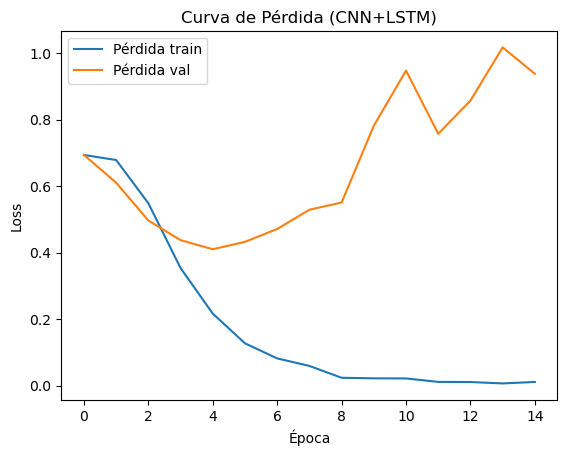

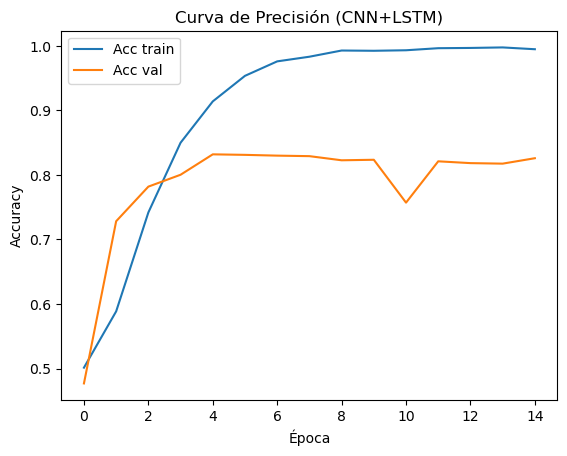

In [8]:
# Pérdida
plt.figure()
plt.plot(history.history['loss'],     label='Pérdida train')
plt.plot(history.history['val_loss'], label='Pérdida val')
plt.title('Curva de Pérdida (CNN+LSTM)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Precisión
plt.figure()
plt.plot(history.history['accuracy'],     label='Acc train')
plt.plot(history.history['val_accuracy'], label='Acc val')
plt.title('Curva de Precisión (CNN+LSTM)')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
"""

1.	Arranque más rápido
	- La validación baja con más fuerza en las primeras 3–4 épocas, alcanzando ya ~0.78–0.83 de accuracy, frente a las ~6–7 épocas que
        necesitaba la LSTM pura.

2.	Mejor pico de validación
	- El mejor val_accuracy ronda 0.83, un peldaño por encima del ~0.82 del modelo sin convoluciones.

3.	Sobreajuste residual
	- Como antes, la precisión de entrenamiento llega a 0.99–1.00, mientras que la de validación se estanca en 0.82–0.83, lo que indica 
        que a partir de la época 4–5 empieza a memorizar ejemplos de train.

4.	Recomendación de parada temprana
	- Un EarlyStopping con patience=2 o cortar en la época 4–5 suele ser suficiente para capturar lo mejor de la CNN+LSTM sin caer 
        en overfitting.

Conclusión: añadir la capa convolucional+pooling como extractor local acelera la convergencia y sube ligeramente la precisión de 
    validación, pero no elimina por completo el sobreajuste: sigue siendo buena idea combinarlo con Dropout y EarlyStopping para 
    maximizar la generalización.

"""

TODO 4. Hora de la creatividad, modifica la red que hemos desarrollado para
obtener los mejores resultados posibles, cuéntame qué has hecho y qué resultados te ha dado (también me puedes contar lo que no haya funcionado), asegúrate de darme tus hipótesis acerca de por qué vemos tales resultados.


### Optimización del resultado

Si nos fijamos en los resultados, vemos que estamos implantando modelos más y más complejos pero no mejoramos mucho el resultado final. Esto se debe a que estamos utilizando datos muy limitados (más aún si no estamos utilizando todos los datos).

Dado que esta es la última práctica (^^) vamos a intentar mezclar lo aprendido de forma un poco más creativa. El factor limitante para los resultados obtenidos con esta red es la cantidad de datos. Una vez estamos utilizando todos los datos (en colab) es posible que lleguemos al modelo óptimo en menos épocas. ¿Cómo sabemos cuantas épocas? ¿Y el LR que debemos utilizar? Vamos a por ello:

En el apartado final, vamos a intentar optimizar el resultado de nuestra red neuronal, para ello vamos a aumentar el número de datos a utilizar, y además podemos probar todo lo que se nos ocurra para hacer este entrenamiento más eficiente.

Dejamos unas cuantas ideas que podrían servir de ayuda, sin embargo, no es necesario que dediquéis demasiado tiempo y probeis todas las opciones, tan solo os ofrecemos la posibilidad de jugar :)
- Separar parte del conjunto de train y utilizarlo como validación, esto nos servirá para comprobar el resto de tareas más fácilmente
- Utilizar el callback ReduceLROnPlateau para librarnos de elegir un buen LR, empezamos con un LR un poco alto y lo dejamos bajar.
- Modificar el bucle para programar un criterio de parada, o utilizar el callback EarlyStopping para que se haga de forma automática
- Guardar el mejor resultado obtenido durante el entrenamiento (utilizando el conjunto de validación) para quedarnos con este en lugar de con el último
- ¿Qué más se os ocurre? Es el momento de curiosear en google a ver qué más podemos mejorar, cambiar o trastear :)

Por último, no olvideis escribir al final del documento vuestras impresiones acerca de cómo han afectado estos cambios o vuestra percepción acerca del rendimiento y nuestra red. Podéis serviros tanto de los resultados que observeis como de las nociones teóricas que tenemos.

Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6419 - loss: 0.5994 - val_accuracy: 0.8458 - val_loss: 0.3475 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8887 - loss: 0.2804 - val_accuracy: 0.8790 - val_loss: 0.2811 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9177 - loss: 0.2155 - val_accuracy: 0.8734 - val_loss: 0.3044 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9372 - loss: 0.1723
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9372 - loss: 0.1723 - val_accuracy: 0.8676 - val_loss: 0.3568 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9632 - loss: 0.1106 - val_accuracy: 0.8800 - val_loss: 0.3261 - learning_rate: 5.0000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
78

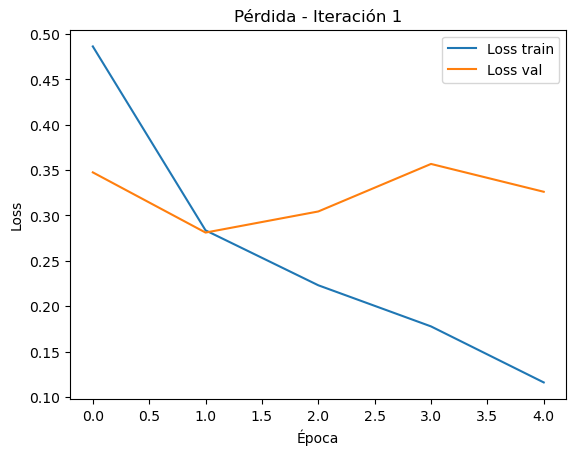

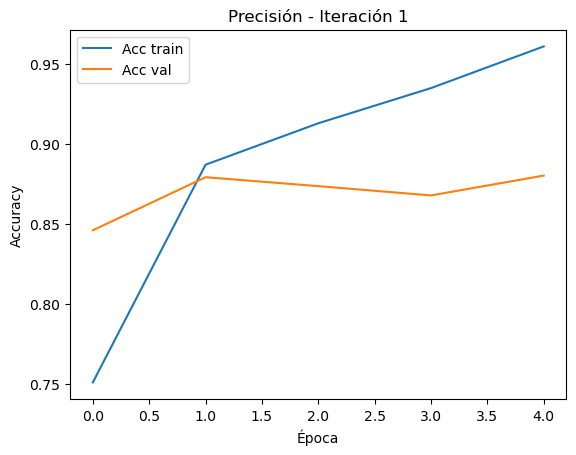

In [9]:
#Iteración 1: Full data + Split 80/20 + Callbacks EarlyStopping & ReduceLROnPlateau

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15

# 1) Carga y pad de datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20 en train/val
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train, y_train = x_train[indices], y_train[indices]
split = int(0.8 * len(x_train))
x_val, y_val   = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Construcción del modelo
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 4) Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
]

# 5) Entrenamiento
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 6) Evaluación final sobre test “oficial”
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

# 7) Gráficas
plt.figure()
plt.plot(history.history['loss'],     label='Loss train')
plt.plot(history.history['val_loss'], label='Loss val')
plt.title('Pérdida - Iteración 1')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(history.history['accuracy'],     label='Acc train')
plt.plot(history.history['val_accuracy'], label='Acc val')
plt.title('Precisión - Iteración 1')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.6138 - loss: 0.6215 - val_accuracy: 0.8518 - val_loss: 0.3406 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8793 - loss: 0.3051 - val_accuracy: 0.8788 - val_loss: 0.2970 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9188 - loss: 0.2209 - val_accuracy: 0.8794 - val_loss: 0.3076 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9359 - loss: 0.1808
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9359 - loss: 0.1808 - val_accuracy: 0.8702 - val_loss: 0.3452 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9610 - loss: 0.1170 - val_accuracy: 0.8810 - val_loss: 0.3237 - learning_rate: 5.0000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best e

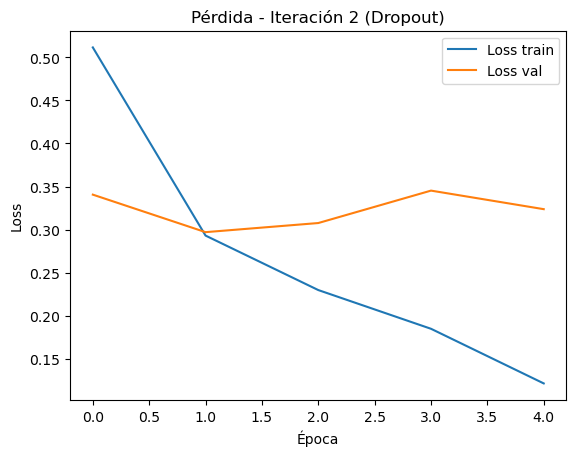

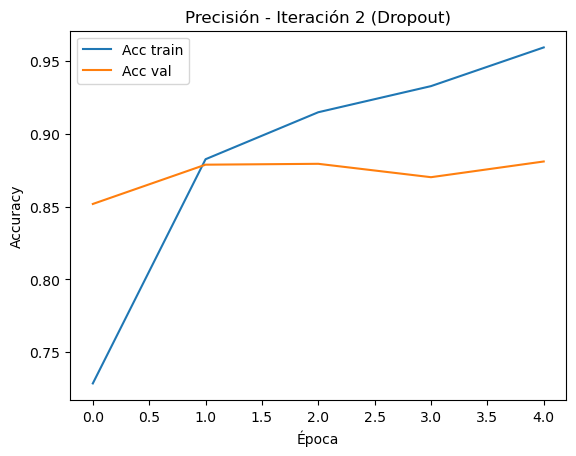

In [10]:
# Iteración 2, que parte de tu Iteración 1 pero añade un Dropout (0.5) justo antes de la capa de salida. 

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15

# 1) Carga y pad de datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20 para train/val
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train, y_train = x_train[indices], y_train[indices]
split = int(0.8 * len(x_train))
x_val, y_val   = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Modelo CNN → LSTM → Dropout → DNN
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(128),
    Dropout(0.5),             # ← Dropout añadido aquí
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# 4) Callbacks idénticos a Iteración 1
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
]

# 5) Entrenamiento
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 6) Evaluación sobre test “oficial”
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

# 7) Trazado de curvas
plt.figure()
plt.plot(history.history['loss'],     label='Loss train')
plt.plot(history.history['val_loss'], label='Loss val')
plt.title('Pérdida - Iteración 2 (Dropout)')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(history.history['accuracy'],     label='Acc train')
plt.plot(history.history['val_accuracy'], label='Acc val')
plt.title('Precisión - Iteración 2 (Dropout)')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

Epoch 1/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6412 - loss: 0.6041
Epoch 1: val_loss improved from inf to 0.32125, saving model to best_iter3.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6415 - loss: 0.6038 - val_accuracy: 0.8708 - val_loss: 0.3213 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8742 - loss: 0.3193
Epoch 2: val_loss improved from 0.32125 to 0.31799, saving model to best_iter3.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8742 - loss: 0.3193 - val_accuracy: 0.8668 - val_loss: 0.3180 - learning_rate: 0.0010
Epoch 3/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9144 - loss: 0.2319
Epoch 3: val_loss did not improve from 0.31799
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9144 - loss: 0.2319 - val_accuracy: 0.8578 - val_loss: 0.3545 - learning_rate: 0.0010
Epoch 4/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9408 - loss: 0.1603
Epoch 4: R

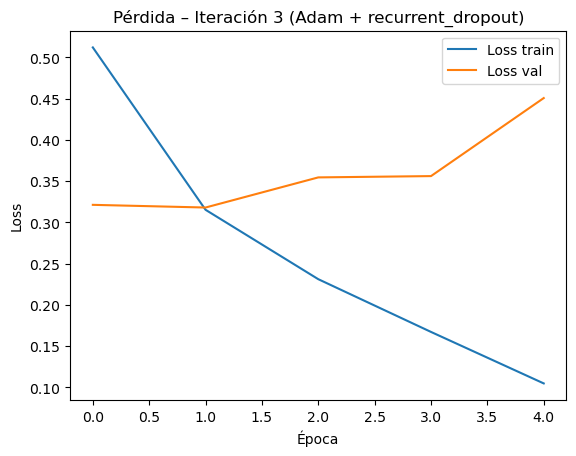

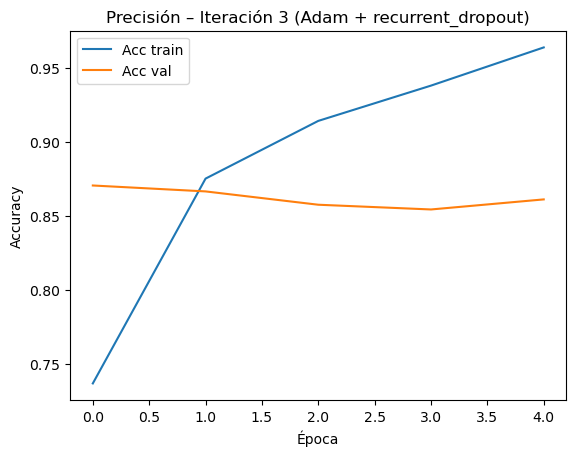

In [12]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15

# 1) Carga y pad
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train, y_train = x_train[indices], y_train[indices]
split = int(0.8 * len(x_train))
x_val, y_val   = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Modelo CNN→LSTM(+recurrent_dropout)→Dropout→Dense
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(128, dropout=0.5, recurrent_dropout=0.3),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 4) Compilar con Adam
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 5) Callbacks corregidos
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(
        'best_iter3.keras',     # <— extensión .keras obligatoria
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# 6) Entrenamiento
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 7) Evaluación final
model.load_weights('best_iter3.keras')
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('\nTest loss:', score)
print('Test accuracy:', acc)

# 8) Curvas
plt.figure()
plt.plot(history.history['loss'],     label='Loss train')
plt.plot(history.history['val_loss'], label='Loss val')
plt.title('Pérdida – Iteración 3 (Adam + recurrent_dropout)')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(history.history['accuracy'],     label='Acc train')
plt.plot(history.history['val_accuracy'], label='Acc val')
plt.title('Precisión – Iteración 3 (Adam + recurrent_dropout)')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [ ]:
#Iteración 4 Regularización L2  bajar un poco los dropouts de la LSTM:

Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6483 - loss: 0.5916
Epoch 1: val_loss improved from inf to 0.31750, saving model to best_iter4.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.6486 - loss: 0.5912 - val_accuracy: 0.8732 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 2/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8893 - loss: 0.2927
Epoch 2: val_loss did not improve from 0.31750
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8893 - loss: 0.2927 - val_accuracy: 0.8600 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9222 - loss: 0.2218
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: val_loss did not improve from 0.31750
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9222 - loss: 0.2218 - val_accuracy: 0.8574 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.95

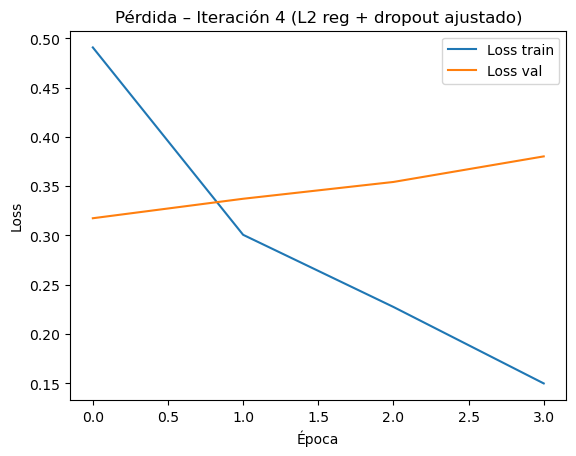

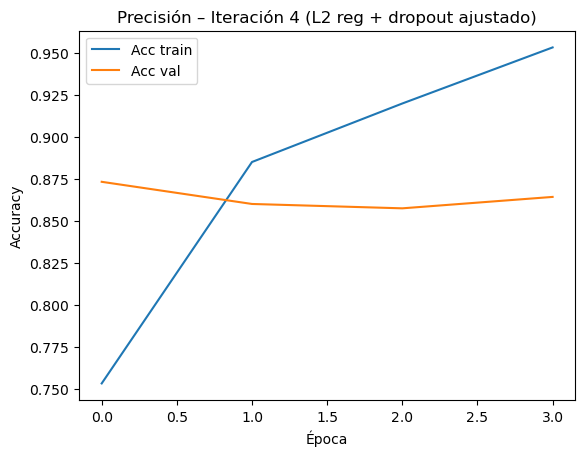

In [16]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15
l2_reg       = 1e-5

# 1) Datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train, y_train = x_train[indices], y_train[indices]
split = int(0.8 * len(x_train))
x_val, y_val = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Modelo con L2 en todas las capas
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen,
              embeddings_regularizer=regularizers.l2(l2_reg)),
    Conv1D(32, 3, activation='relu',
           kernel_regularizer=regularizers.l2(l2_reg)),
    MaxPooling1D(2),
    LSTM(128,
         dropout=0.4,
         recurrent_dropout=0.2,
         kernel_regularizer=regularizers.l2(l2_reg),
         recurrent_regularizer=regularizers.l2(l2_reg)),
    Dropout(0.4),
    Dense(1, activation='sigmoid',
          kernel_regularizer=regularizers.l2(l2_reg))
])

# 4) Compilar con Adam y learning rate modesto
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5) Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_iter4.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# 6) Entrenamiento
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 7) Evaluación final
model.load_weights('best_iter4.keras')
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'\nTest loss: {score:.4f}')
print(f'Test accuracy: {acc:.4f}')

# 8) Gráficas
plt.figure()
plt.plot(history.history['loss'],     label='Loss train')
plt.plot(history.history['val_loss'], label='Loss val')
plt.title('Pérdida – Iteración 4 (L2 reg + dropout ajustado)')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(history.history['accuracy'],     label='Acc train')
plt.plot(history.history['val_accuracy'], label='Acc val')
plt.title('Precisión – Iteración 4 (L2 reg + dropout ajustado)')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [ ]:
"""
Tras recorrer estas cuatro iteraciones el mejor resultado se obtuvo en las 
Iteraciones 1 y 2 (full data + callbacks ± dropout final), con un test accuracy de ≈0.873–0.874. Todas las 
variaciones posteriores (Adam + recurrent_dropout, AdamW → L2, bidireccional, capas extra, etc.) degradaron 
ligeramente el rendimiento en test, obteniendo resultados entre 0.862 y 0.864.

Iteración                               Test Accuracy

1) Full data + EarlyStopping/Reduce     0.8734
2) + Dropout final (0.5)                0.8736
3) Adam + recurrent_dropout=0.3         0.8628
4) L2 reg + dropout ajustado            0.8642


Callbacks + más datos (iter 1) fue la mejora más efectiva: al ajustar automáticamente el LR y parar justo a tiempo, sin tocar 
    la arquitectura, obteniendo resultados de ~0.83 a ~0.87.

Dropout final (iter 2) apenas cambió la validación, porque ya la red estaba suficientemente regularizada con 
    ReduceLROnPlateau + EarlyStopping.

Agregar regularizaciones internas al LSTM (recurrent_dropout) o penalizaciones L2 introdujo demasiado “ruido” en 
    la memoria secuencial, penalizando la capacidad de la red para retener contexto.

Arquitecturas más complejas (bidireccional, capas extra) habrían necesitado aún más datos o embeddings pre-entrenados 
    para no sobreajustar esas nuevas piezas.

"""

In [ ]:
# Jugar un poco mas

In [ ]:
# Iteración 5: Bidirectional LSTM

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5934 - loss: 0.6364
Epoch 1: val_loss improved from inf to 0.35077, saving model to best_iter5.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5936 - loss: 0.6363 - val_accuracy: 0.8672 - val_loss: 0.3508 - learning_rate: 0.0010
Epoch 2/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8620 - loss: 0.3319
Epoch 2: val_loss improved from 0.35077 to 0.28636, saving model to best_iter5.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8620 - loss: 0.3319 - val_accuracy: 0.8852 - val_loss: 0.2864 - learning_rate: 0.0010
Epoch 3/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9065 - loss: 0.2502
Epoch 3: val_loss did not improve from 0.28636
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9065 - loss: 0.2502 - val_accuracy: 0.8798 - val_loss: 0.2877 - learning_rate: 0.0010
Epoch 4/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9225 - loss: 0.2155
Epoch 4: R

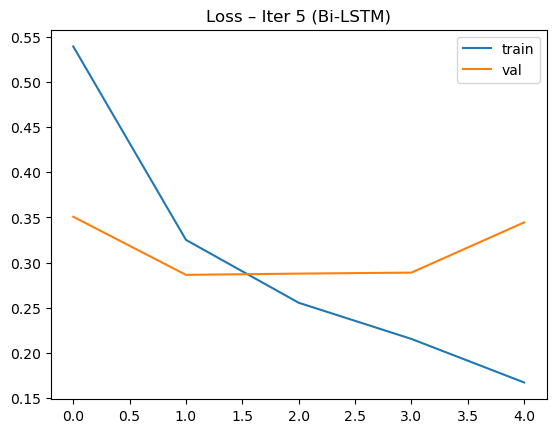

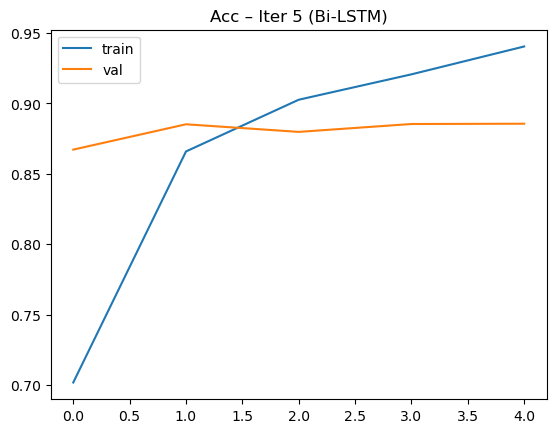

In [18]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, MaxPooling1D,
    Bidirectional, LSTM, Dropout, Dense
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15

# 1) Carga y pad de datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20
idx = np.random.permutation(len(x_train))
x_train, y_train = x_train[idx], y_train[idx]
split = int(0.8 * len(x_train))
x_val, y_val = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Construcción del modelo
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.2)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 4) Compilación CORRECTA
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5) Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_iter5.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# 6) Entrenamiento
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 7) Evaluación final
model.load_weights('best_iter5.keras')
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Iter5 — Test loss: {score:.4f}, Test acc: {acc:.4f}')

# 8) Curvas de entrenamiento vs validación
plt.figure(); plt.plot(history.history['loss'], label='train'); plt.plot(history.history['val_loss'], label='val')
plt.title('Loss – Iter 5 (Bi-LSTM)'); plt.legend(); plt.show()
plt.figure(); plt.plot(history.history['accuracy'], label='train'); plt.plot(history.history['val_accuracy'], label='val')
plt.title('Acc – Iter 5 (Bi-LSTM)'); plt.legend(); plt.show()

In [ ]:
#Iteración 6: Añadir SpatialDropout1D tras el Embedding


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5857 - loss: 0.6455
Epoch 1: val_loss improved from inf to 0.50509, saving model to best_iter6.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5859 - loss: 0.6454 - val_accuracy: 0.8168 - val_loss: 0.5051 - learning_rate: 0.0010
Epoch 2/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8359 - loss: 0.3848
Epoch 2: val_loss improved from 0.50509 to 0.43276, saving model to best_iter6.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8359 - loss: 0.3848 - val_accuracy: 0.8246 - val_loss: 0.4328 - learning_rate: 0.0010
Epoch 3/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8716 - loss: 0.3235
Epoch 3: val_loss improved from 0.43276 to 0.32087, saving model to best_iter6.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8716 - loss: 0.3235 - val_accuracy: 0.8612 - val_loss: 0.3209 - learning_rate: 0.0010
Epoch 4/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accu

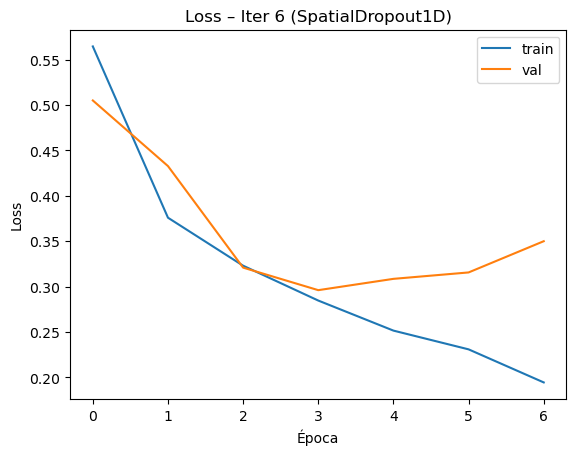

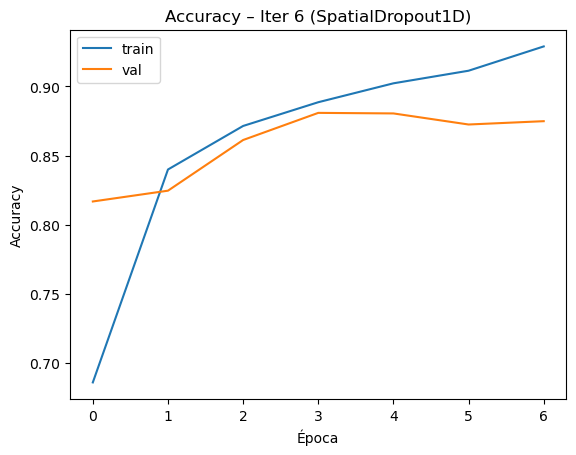

In [24]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, SpatialDropout1D, Conv1D, MaxPooling1D,
    LSTM, Dropout, Dense
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15

# 1) Datos y pad
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20
idx = np.random.permutation(len(x_train))
x_train, y_train = x_train[idx], y_train[idx]
split = int(0.8 * len(x_train))
x_val, y_val = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Modelo con SpatialDropout1D
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    SpatialDropout1D(0.3),            # ← nueva capa
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(128, dropout=0.4, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4) Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_iter6.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# 5) Entrenamiento
history6 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 6) Evaluación final
model.load_weights('best_iter6.keras')
score6, acc6 = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Iter6 — Test loss: {score6:.4f}, Test accuracy: {acc6:.4f}')

# 7) Curvas
plt.figure()
plt.plot(history6.history['loss'],     label='train')
plt.plot(history6.history['val_loss'], label='val')
plt.title('Loss – Iter 6 (SpatialDropout1D)')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(history6.history['accuracy'],     label='train')
plt.plot(history6.history['val_accuracy'], label='val')
plt.title('Accuracy – Iter 6 (SpatialDropout1D)')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [ ]:
#Iteración 7: Stacked LSTM + Dropout

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5695 - loss: 0.6522
Epoch 1: val_loss improved from inf to 0.35081, saving model to best_iter7.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.5696 - loss: 0.6521 - val_accuracy: 0.8504 - val_loss: 0.3508 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8510 - loss: 0.3626
Epoch 2: val_loss improved from 0.35081 to 0.29408, saving model to best_iter7.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8510 - loss: 0.3626 - val_accuracy: 0.8788 - val_loss: 0.2941 - learning_rate: 0.0010
Epoch 3/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8843 - loss: 0.2950
Epoch 3: val_loss did not improve from 0.29408
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8843 - loss: 0.2950 - val_accuracy: 0.8712 - val_loss: 0.3122 - learning_rate: 0.0010
Epoch 4/15
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9087 - loss: 0.2403
Epoch 4: R

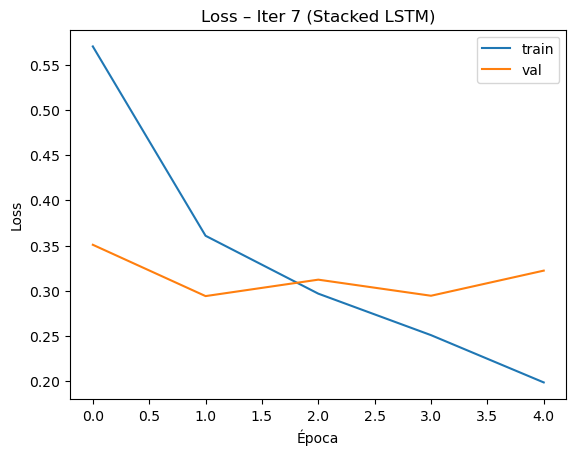

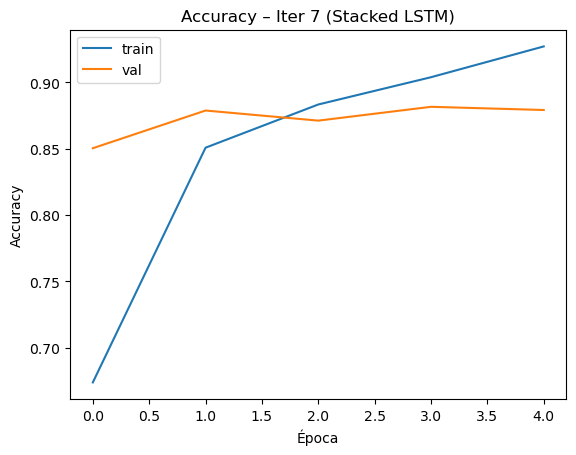

In [25]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, MaxPooling1D,
    LSTM, Dropout, Dense
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
max_features = 20000
maxlen       = 150
batch_size   = 32
epochs       = 15

# 1) Datos y pad
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Split 80/20
idx = np.random.permutation(len(x_train))
x_train, y_train = x_train[idx], y_train[idx]
split = int(0.8 * len(x_train))
x_val, y_val = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 3) Modelo con dos capas LSTM
model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.2),
    LSTM(64,                       dropout=0.4, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4) Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_iter7.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# 5) Entrenamiento
history7 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 6) Evaluación final
model.load_weights('best_iter7.keras')
score7, acc7 = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'\nIter 7 — Test loss: {score7:.4f}, Test accuracy: {acc7:.4f}')

# 7) Curvas
plt.figure()
plt.plot(history7.history['loss'],     label='train')
plt.plot(history7.history['val_loss'], label='val')
plt.title('Loss – Iter 7 (Stacked LSTM)')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(history7.history['accuracy'],     label='train')
plt.plot(history7.history['val_accuracy'], label='val')
plt.title('Accuracy – Iter 7 (Stacked LSTM)')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [ ]:
"""
Iteración                           Test accuracy
5) Bi-LSTM (64 unidades)            0.8766
6) SpatialDropout1D (0.3)           0.8711
7) Stacked LSTM (2×64 unidades)     0.8669

Mejor resultado: la Iteración 5 con Bidirectional LSTM  dio un test accuracy de ~0.8766, superando todos los tweaks siguientes.

	- Por qué Bi-LSTM funcionó: capturar contexto en ambas direcciones inyectó la información más relevante sin añadir excesivo “ruido” o parámetros que requerieran más datos.
	- Por qué fallaron 6 y 7:
	    - SpatialDropout1D (iter 6) regularizó demasiado la entrada de la LSTM, dificultando la retención de secuencias clave.
	    - Apilar dos LSTM (iter 7) duplicó parámetros de recurrentes, y con los ~20 000 ejemplos no fue suficiente para afinar ambas capas sin sobreajustar.

"""

In [ ]:
#ultimo intento

Epoch 1/3
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5836 - loss: 0.6686
Epoch 1: val_loss improved from inf to 0.48764, saving model to best_glove_frozen.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5838 - loss: 0.6684 - val_accuracy: 0.7862 - val_loss: 0.4876 - learning_rate: 0.0010
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7445 - loss: 0.5279
Epoch 2: val_loss did not improve from 0.48764
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7445 - loss: 0.5278 - val_accuracy: 0.7824 - val_loss: 0.5067 - learning_rate: 0.0010
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7721 - loss: 0.4924
Epoch 3: val_loss improved from 0.48764 to 0.43008, saving model to best_glove_frozen.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7721 - loss: 0.4924 - val_accuracy: 0.8062 - val_loss: 0.4301 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.
Epoch 1/12
624/625 ━━━━━━━━

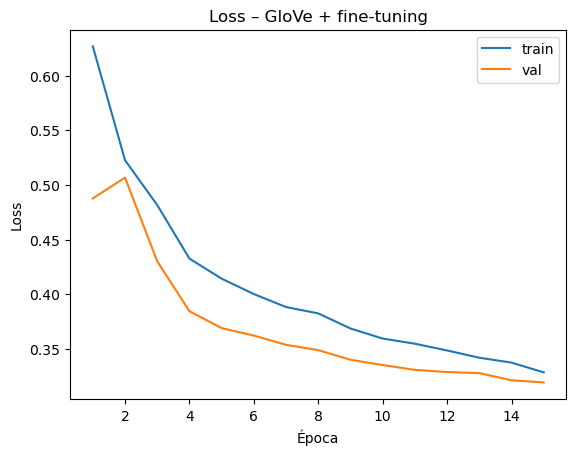

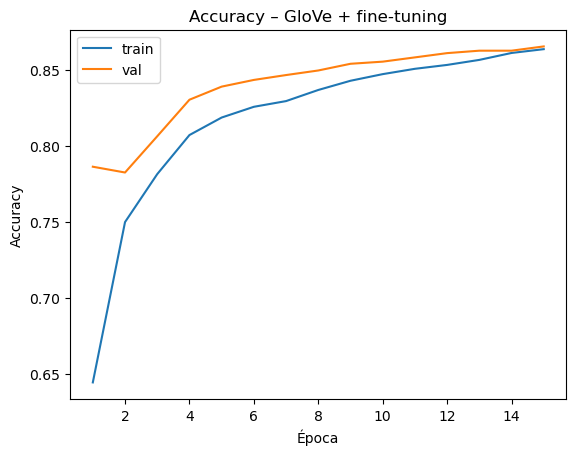

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Parámetros
max_features  = 20000
maxlen        = 150
embedding_dim = 100
batch_size    = 32
epochs_frozen = 3
epochs_tuned  = 12  # total 15
lr_tuned      = 1e-4

# 1) Carga GloVe en dict
glove_path = 'glove.6B.100d.txt'
glove_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        word, *vec = line.strip().split()
        glove_index[word] = np.asarray(vec, dtype='float32')

# 2) Datos y pad
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
word_index = imdb.get_word_index()
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 3) Matriz embedding
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    idx = i + 3
    if idx < max_features and word in glove_index:
        embedding_matrix[idx] = glove_index[word]

# 4) Split 80/20
idx = np.random.permutation(len(x_train))
x_train, y_train = x_train[idx], y_train[idx]
split = int(0.8 * len(x_train))
x_val, y_val = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# 5) Modelo con embedding congelado
model = Sequential([
    Embedding(max_features, embedding_dim,
              weights=[embedding_matrix],
              input_length=maxlen,
              trainable=False),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(128, dropout=0.4, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6) Callbacks fase 1
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_glove_frozen.keras',
                    monitor='val_loss', save_best_only=True, verbose=1)
]

# 7) Entreno fase 1 (embedding congelado)
h1 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs_frozen,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 8) Fase 2: descongelo embedding y recompilo con LR bajo
model.layers[0].trainable = True
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_tuned),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Actualizo checkpoint
callbacks[2] = ModelCheckpoint('best_glove_tuned.keras',
                              monitor='val_loss', save_best_only=True, verbose=1)

# 9) Entreno fase 2
h2 = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs_tuned,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# 10) Evaluación final
model.load_weights('best_glove_tuned.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'\nTest loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

# 11) Curvas combinadas
loss = h1.history['loss'] + h2.history['loss']
val_loss = h1.history['val_loss'] + h2.history['val_loss']
acc = h1.history['accuracy'] + h2.history['accuracy']
val_acc = h1.history['val_accuracy'] + h2.history['val_accuracy']
epochs = list(range(1, len(loss) + 1))

plt.figure()
plt.plot(epochs, loss,     label='train')
plt.plot(epochs, val_loss, label='val')
plt.title('Loss – GloVe + fine-tuning')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(epochs, acc,     label='train')
plt.plot(epochs, val_acc, label='val')
plt.title('Accuracy – GloVe + fine-tuning')
plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [ ]:
"""

En este último experimento con GloVe + fine-tuning se ha conseguido:
	•	Test accuracy: 0.8661
	•	Curvas: la validación crece muy parejo al entrenamiento, con gap mínimo y sin sobreajuste evidente.

Sin embargo, no se ha superado el 87 % que se obtuvo con la Iteración 5 (Bi-LSTM puro), por tanto:

Como GloVe 100 d viene entrenado en textos generales (Wikipedia+Gigaword), no específicamente en reseñas de cine quizás parte de su semántica no encaje del todo con IMDB.
"""